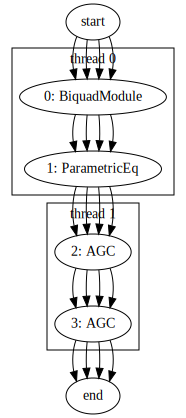

In [3]:
from audio_dsp.design.pipeline import Pipeline
from audio_dsp.stages.parametric_eq import ParametricEq
from audio_dsp.stages.agc import AGC
from audio_dsp.stages.biquad_module import BiquadModule

# 4 inputs
p = Pipeline(4)

with p.add_thread() as t:
    [pe0, pe1] = t.stages((BiquadModule, ParametricEq), p.i)
  
with p.add_thread() as t:
    agc = t.stage(AGC, pe1.o)
    agc1 = t.stage(AGC, agc.o)

p.draw()
p.validate()

In [4]:
import time
from audio_dsp.design.pipeline import generate_dsp_main
generate_dsp_main(p)
# !cmake --build build -j
#!xrun bin/2AMi2o2xxxxxx/app_usb_aud_xk_evk_xu316_dsp_2AMi2o2xxxxxx.xe
time.sleep(5)

In [ ]:
# do tuning
#pe0["filter_coeffs"] = list(range(10))
agc1["gain"] = str(1.0)

from audio_dsp.design.pipeline import send_config_to_device
send_config_to_device(p, "/Users/shuchitak/sandboxes/host_xvf_control/build/xvf_host")